# Lectura y gráfica de un EEG

#### importación de librerias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re
from scipy import signal

#### Abrir archivo txt

In [2]:
f = open("Archivos_EEG/EEG_Ultracortex/OpenBCI-RAW.txt","r")
raw_data = f.readlines()[2] # con f.read() leemos todo el contenido
f.close()

raw_data

'%Sample Rate = 250 Hz\n'

In [3]:
x = re.findall("[0-5][0-9]\d", raw_data)

print(x)

['250']


In [4]:
Fs = float(x[0])
Ts=1/Fs

print(f" Fs={Fs} hz\n Ts={Ts} s")

 Fs=250.0 hz
 Ts=0.004 s


#### Leer archivo excluyendo encabezado

In [5]:
SenalEEG = np.genfromtxt("Archivos_EEG/EEG_Ultracortex/OpenBCI-RAW.txt", delimiter=",",skip_header = 5)


### Visualización de la señal

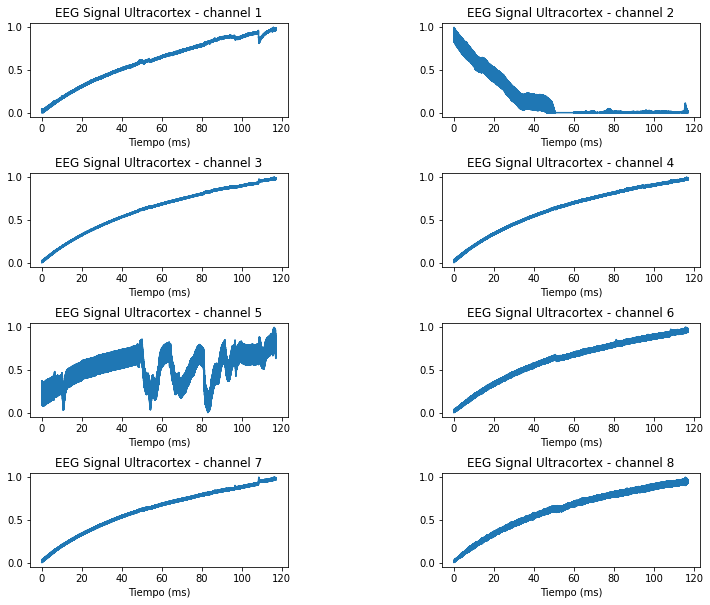

In [6]:
aux = SenalEEG[:, 1:]
fig, axs = plt.subplots(4,2, figsize=(12,10))
plt.subplots_adjust(hspace=0.6, wspace=0.6)
count = 0
for i in range(0,4):
    for j in range (0,2):
    # Normalización de la señal EEG en reposo
        y1 = (aux[1:, count])
        y1 = y1  - np.min(y1)
        y1 = y1 / np.max(y1)
        t1 = (np.arange(0,len(y1)) / Fs)
        axs[i,j].plot(t1,y1)
        axs[i,j].set_title(f'EEG Signal Ultracortex - channel {count +1}')
        axs[i,j].set_xlabel('Tiempo (ms)')
        #axs[i,j].set_xlim(25,26)
        count +=1 

# fig = plt.gcf()
# fig.set_facecolor('white')
# plt.savefig('EEG_Ultracórtex_signals', transparent=False, )
plt.show()

#### Análisis en el dominio de la frecuencia

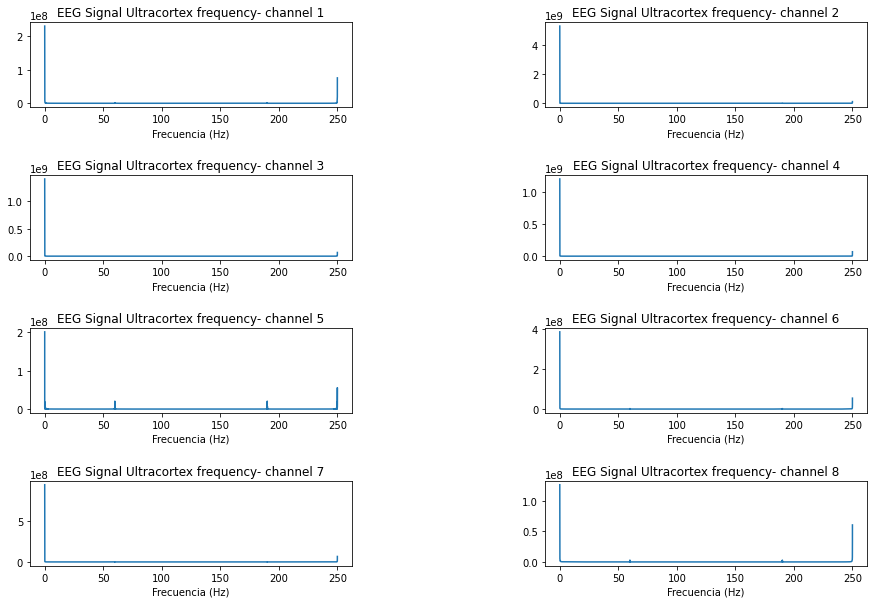

In [7]:
aux = SenalEEG[:, 1:]
fig, axs = plt.subplots(4,2, figsize=(15,10))
plt.subplots_adjust(hspace=0.8, wspace=0.6)
count = 0
for i in range(0,4):
    for j in range (0,2):

        y1 = (aux[1:, count])
        X1 = np.fft.fft(y1)
        X1 = np.abs(X1)
        N1 = len(y1)
        f1 = (Fs) * (np.arange(1,N1+1)/N1)
        axs[i,j].plot(f1,X1)
        axs[i,j].set_title(f'EEG Signal Ultracortex frequency- channel {count +1}')
        axs[i,j].set_xlabel('Frecuencia (Hz)')
        #axs[i,j].set_xlim(0,Fs/2)
        count +=1 


# fig = plt.gcf()
# fig.set_facecolor('white')
# plt.savefig('FFT_Ultracórtex.png', transparent=False, )